In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC


In [2]:

X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()


In [3]:
def grid_search_MNB(alphas):
    parameters = {'alpha': alphas}
    classifier = MultinomialNB()
    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,
    )
    grid_search.fit(X_train, y_train)
    print("Best alpha: ", grid_search.best_params_['alpha'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search(grid_search, alphas):
    plt.title("MNB")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy (0 - 1)")

    # scores = [entry[1] for entry in grid_search.cv_results_['mean_test_score']]
    train_scores = grid_search.cv_results_["mean_train_score"]
    test_scores = grid_search.cv_results_["mean_test_score"]
    print(test_scores)
    # scores = np.array(scores).reshape(len(alphas), 1)
    plt.plot(alphas, train_scores, 'b')
    plt.plot(alphas, test_scores, 'r')
    # for index, value in enumerate(alphas):
    #     plt.plot(alphas[index], scores[index])
    plt.legend()
    # fig = plt.figure()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best alpha:  29.763514416313132
Accuracy:  0.8963963963963963
[0.88393783 0.88450089 0.88393783 0.88450217 0.88450217 0.88450217
 0.88450217 0.88450217 0.88450344 0.88281298 0.88394037 0.88506523
 0.88506396 0.88562448 0.87717472 0.85013752 0.76395329 0.66085301
 0.57522802 0.51213827]


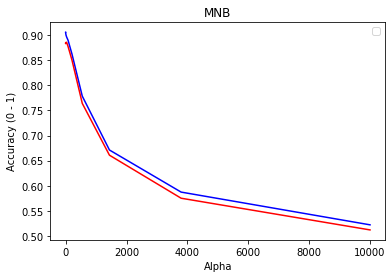

In [11]:
alphas_1 = np.logspace(-4, 4, 20)

grid_search = grid_search_MNB(alphas_1)
graph_grid_search(grid_search, alphas_1)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Best alpha:  12.244897959183675
Accuracy:  0.8986486486486487
[0.88281171 0.88394037 0.88506523 0.88562702 0.88619136 0.88506396
 0.88675315 0.88562448 0.88449835 0.88449962 0.88393529 0.88449835
 0.88393402 0.88393402 0.88449708 0.88449708 0.88393402 0.88280662
 0.88280662 0.88280662 0.88224356 0.88224356 0.88224356 0.88280662
 0.88224356 0.88224356 0.8816805  0.88224356 0.88337096 0.88280789
 0.88280789 0.88168177 0.88168177 0.88055437 0.88055437 0.88055437
 0.87886391 0.87886391 0.87773778 0.87717472 0.87773778 0.87773778
 0.87717472 0.87661039 0.87661039 0.87661039 0.87661039 0.87661039
 0.87661039 0.87661039]


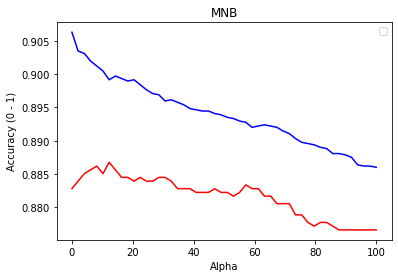

In [12]:
alphas_2 = np.linspace(0, 100, 50)

grid_search = grid_search_MNB(alphas_2)
graph_grid_search(grid_search, alphas_2)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Best alpha:  5.3061224489795915
Accuracy:  0.8986486486486487
[0.88281171 0.88450344 0.88281298 0.88394037 0.88394037 0.88394037
 0.8839391  0.88450217 0.88450217 0.8839391  0.88506523 0.88506523
 0.88506523 0.88675442 0.88562702 0.88562702 0.88562702 0.88562702
 0.88562702 0.88562702 0.88619136 0.88619136 0.88562829 0.88562829
 0.88506396 0.88506396 0.88506396 0.88506396 0.88562702 0.88619008
 0.88675315 0.88618881 0.88618881 0.88675188 0.88618881 0.88562448
 0.88506142 0.88449835 0.88449835 0.88449835 0.88449835 0.88449835
 0.88449835 0.88449835 0.88506269 0.88449962 0.88506269 0.88506269
 0.88506269 0.88449962]


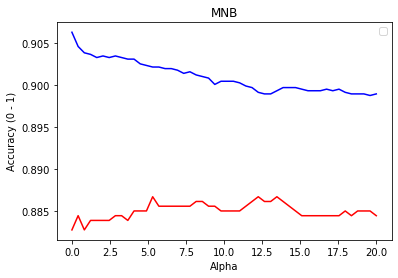

In [13]:
alphas_3 = np.linspace(0, 20, 50)


grid_search = grid_search_MNB(alphas_3)
graph_grid_search(grid_search, alphas_3)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Best alpha:  0.15789473684210525
Accuracy:  0.8986486486486487
[0.88281171 0.88450217 0.88450217 0.8850665  0.88450344 0.88450344
 0.88450344 0.88450344 0.88450344 0.88337731 0.88337731 0.88337731
 0.88281298 0.88337604 0.88337604 0.88281298 0.88281298 0.88281298
 0.88281298 0.88281298]


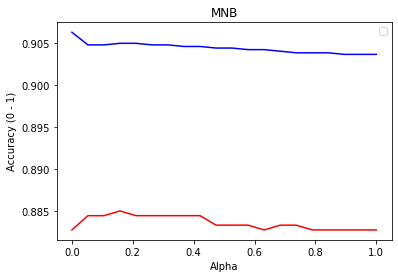

In [14]:
alphas_4 = np.linspace(0, 1, 20)


grid_search = grid_search_MNB(alphas_4)
graph_grid_search(grid_search, alphas_4)